# Preparación del dataset de créditos bancarios

## 1. Librerias y configuraciones previas


In [49]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import LocalOutlierFactor

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [50]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe 
# cols     : lista de columnas a graficar
# num_cols : número de columnas 
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot 
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe. 
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:     
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
     
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1: 
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

## 3. Carga del dataset

Este dataset extraido de *UCI* (nombrado: **german.data** ) contiene información sobre **aprobación de creditos bancarios**, los cuales serán usados para la predicción de un proceso de clasificación indicando si el cliente en bueno o malo, a partir de las diferentes variables.

A continuación una breve descripción de las variables:

****


| Columna                     | Descripción                                                   | Ejemplo |
|:-----------------------------|:---------------------------------------------------------------|:---------|
| checking_account_status     | Estado de la cuenta corriente del solicitante                 | < 0 DM     |
| loan_duration_mo            | Duración del préstamo en meses                                | 42      |
| credit_history              | Historial crediticio del solicitante                          | current loans paid     |
| purpose                     | Propósito del préstamo                                         | furniture/equipment     |
| loan_amount                 | Monto del préstamo en unidades monetarias                      | 7882    |
| savings_account_balance     | Saldo de la cuenta de ahorros del solicitante                  | < 100 DM     |
| time_employed_yrs           | Tiempo de empleo en años                                       | 4 - 7 years       |
| payment_pcnt_income         | Porcentaje del ingreso que se destina al pago del préstamo     | 2       |
| gender_status               | Estado civil y género del solicitante                          | male-single     |
| other_signators             | Indicador de si hay otros firmantes en el préstamo             | guarantor    |
| time_in_residence           | Tiempo de residencia en años                                   | 4       |
| property                    | Tipo de propiedad                                              | building society savings/life insurance    |
| age_yrs                     | Edad en años                                                  | 45      |
| other_credit_outstanding    | Indicador de si hay otros créditos en curso                     | none    |
| home_ownership              | Indicador de si el solicitante es dueño o inquilino de su hogar | for free|
| number_loans                | Número de préstamos existentes en el momento de la solicitud    | 1       |
| job_category                | Categoría laboral del solicitante                              | unskilled-resident	    |
| dependents                  | Número de personas que dependen del solicitante                 | 2       |
| telephone                   | Indicador de si el solicitante tiene un teléfono                 | yes    |
| foreign_worker              | Indicador de si el solicitante es trabajador extranjero         | yes    |
| bad_credit                  | Indicador de si el préstamo resultó en un incumplimiento        | 0       |


****

Url origen datos: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)


In [51]:
#Cargar el dataset
d=pd.read_csv('./datasets/02_GermanCredit.csv')

In [52]:
## Cargar datos con colab
## =============================================================================

#from google.colab import drive 
#import os

#drive.mount('/gdrive')

In [53]:
#os.chdir("/gdrive/MyDrive/ModelosCuantitativosPython/Notebooks")
#!ls

In [54]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Customer ID               1000 non-null   int64 
 1   checking_account_status   1000 non-null   object
 2   loan_duration_mo          1000 non-null   int64 
 3   credit_history            1000 non-null   object
 4   purpose                   1000 non-null   object
 5   loan_amount               1000 non-null   int64 
 6   savings_account_balance   1000 non-null   object
 7   time_employed_yrs         1000 non-null   object
 8   payment_pcnt_income       1000 non-null   int64 
 9   gender_status             1000 non-null   object
 10  other_signators           1000 non-null   object
 11  time_in_residence         1000 non-null   int64 
 12  property                  1000 non-null   object
 13  age_yrs                   1000 non-null   int64 
 14  other_credit_outstanding 

In [55]:
d.head()

,Customer ID,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,...,real estate,67,none,own,2,skilled,1,yes,yes,0
1,6156361,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,...,real estate,22,none,own,1,skilled,1,none,yes,1
2,2051359,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,0
3,8740590,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,0
4,3924540,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,...,unknown-none,53,none,for free,2,skilled,2,none,yes,1


## 4. Limpieza de datos (Data Cleaning)

In [56]:
#Borrando columnas que no se emplearán
d.drop(['Customer ID'], axis='columns', inplace=True)

In [57]:
#Verificación y eliminación de registros duplicados

#Verificación de registros duplicados
d.loc[d.duplicated()]

,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit


## 5. Visualización de datos

### Variables de entrada

In [58]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head()

,checking_account_status,credit_history,purpose,savings_account_balance,time_employed_yrs,gender_status,other_signators,property,other_credit_outstanding,home_ownership,job_category,telephone,foreign_worker
0,< 0 DM,critical account - other non-bank loans,radio/television,unknown/none,>= 7 years,male-single,none,real estate,none,own,skilled,yes,yes
1,0 - 200 DM,current loans paid,radio/television,< 100 DM,1 - 4 years,female-divorced/separated/married,none,real estate,none,own,skilled,none,yes
2,none,critical account - other non-bank loans,education,< 100 DM,4 - 7 years,male-single,none,real estate,none,own,unskilled-resident,none,yes
3,< 0 DM,current loans paid,furniture/equipment,< 100 DM,4 - 7 years,male-single,guarantor,building society savings/life insurance,none,for free,skilled,none,yes
4,< 0 DM,past payment delays,car (new),< 100 DM,1 - 4 years,male-single,none,unknown-none,none,for free,skilled,none,yes


In [59]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()

#Se elimina el elemento bad_credit de la lista de variables Categóricas
numCols.remove('bad_credit')

d[numCols].head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2


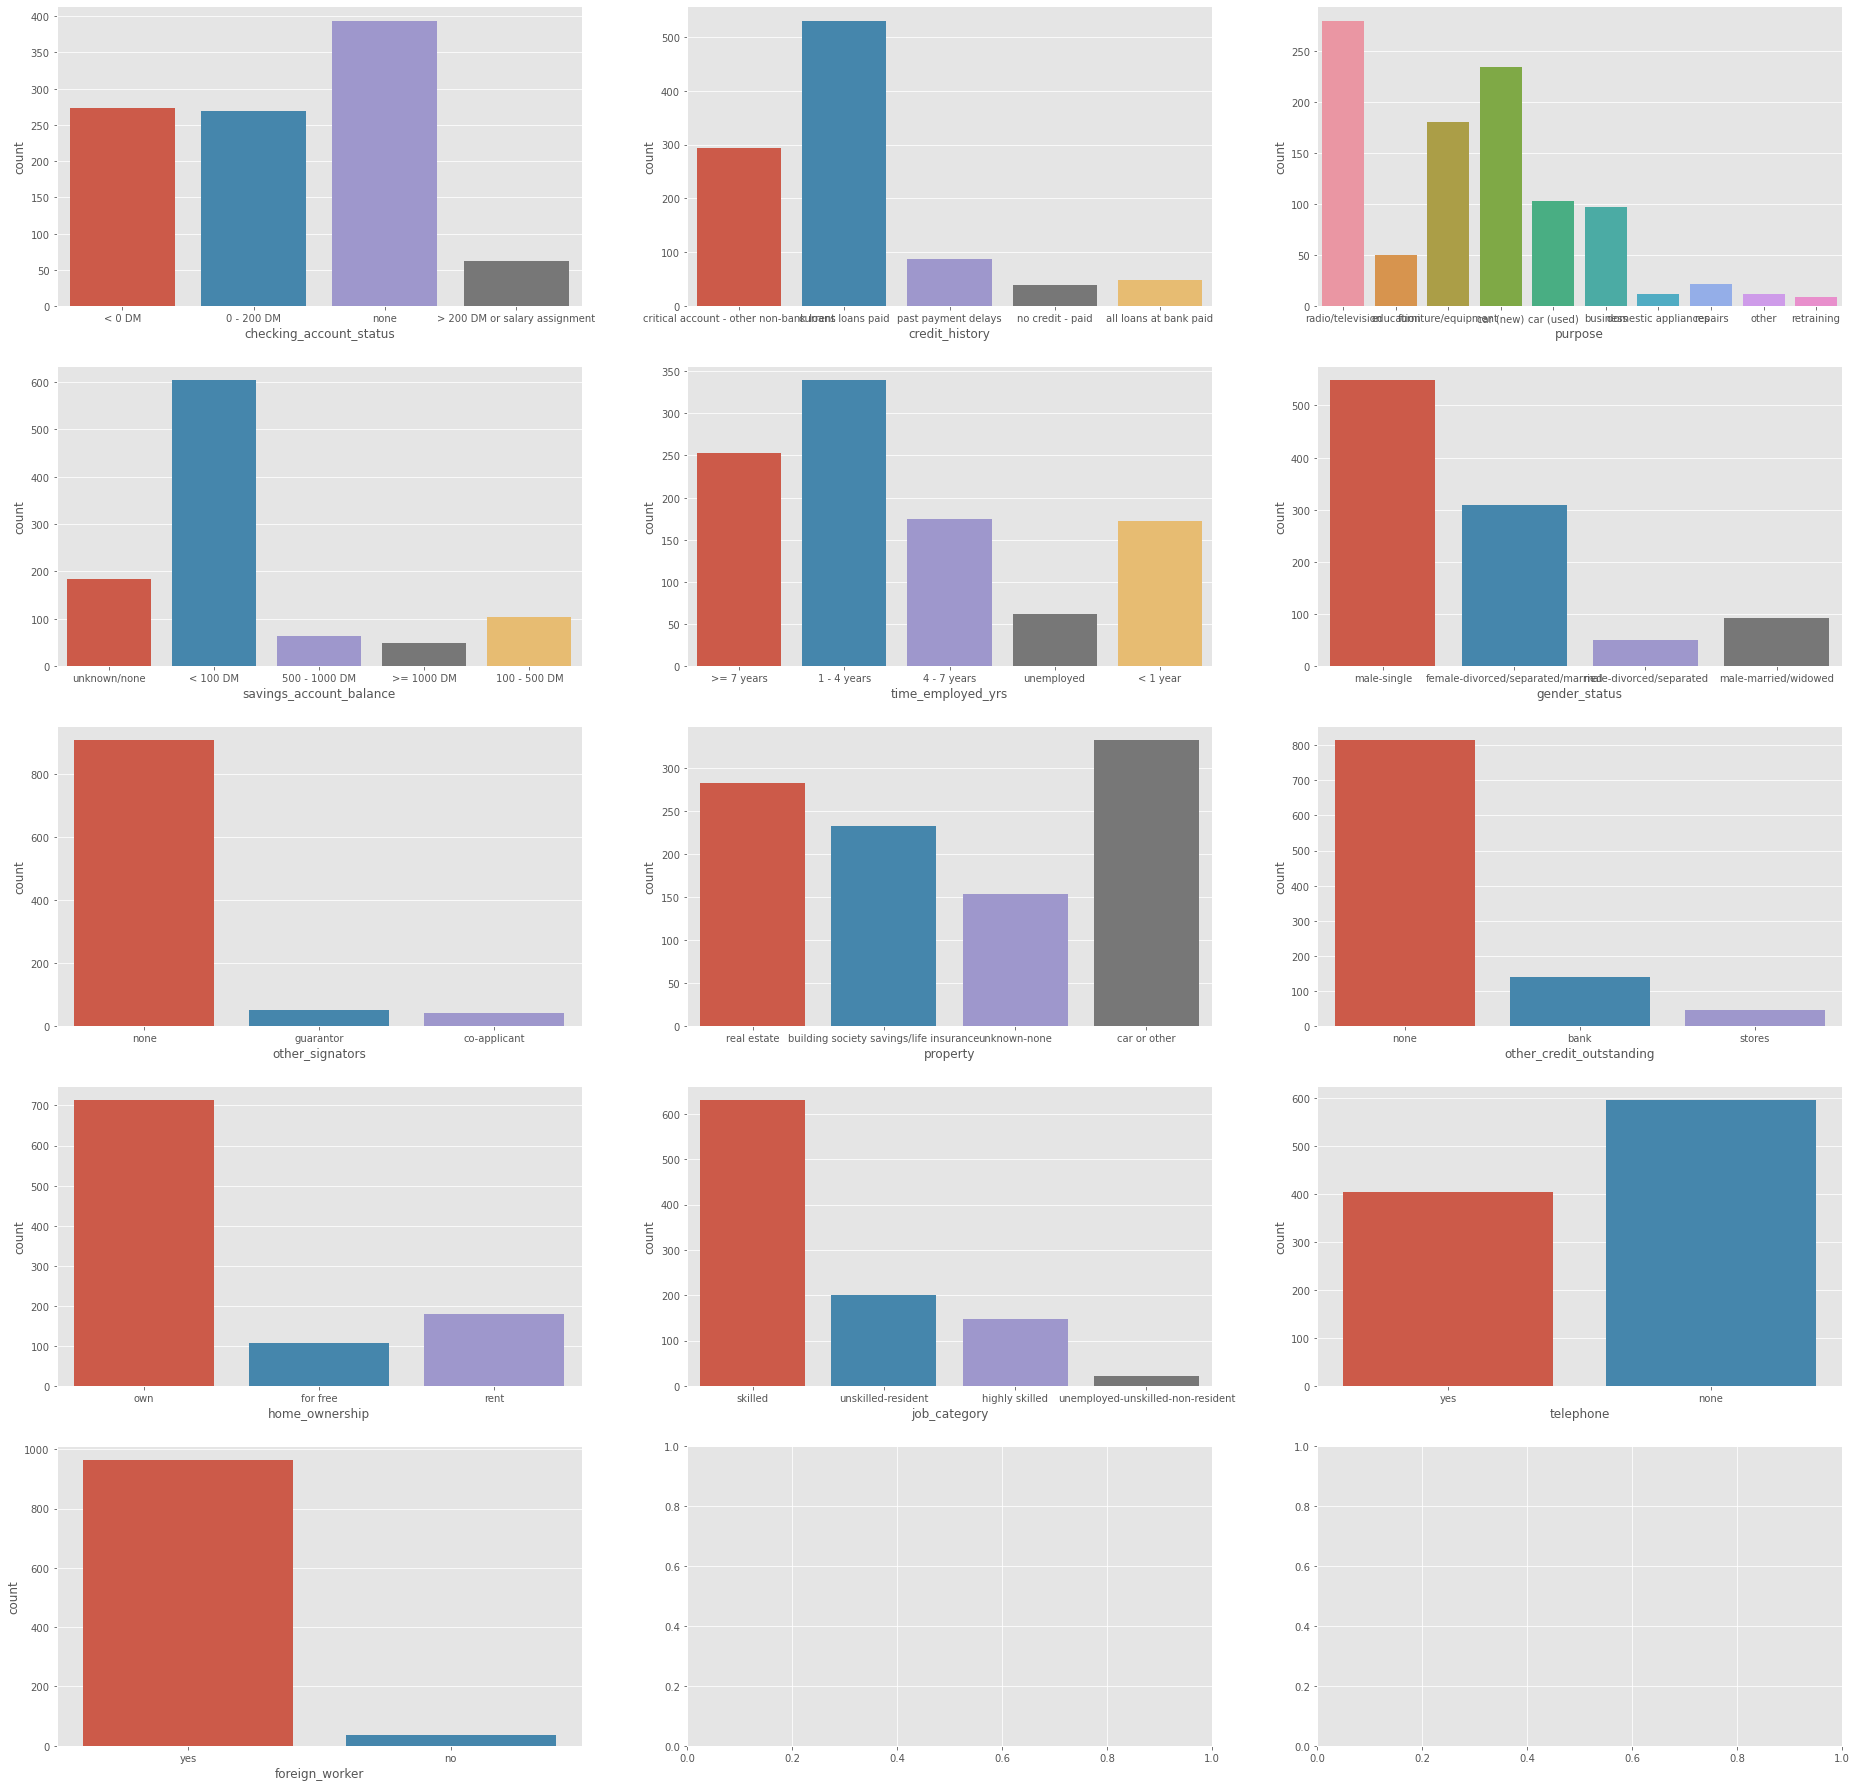

In [60]:
#Visualización de frecuencia de instancias para variables categóricas
plot_multiples_graficas(d,catCols, 3, 5, 'c', None, (32,32))

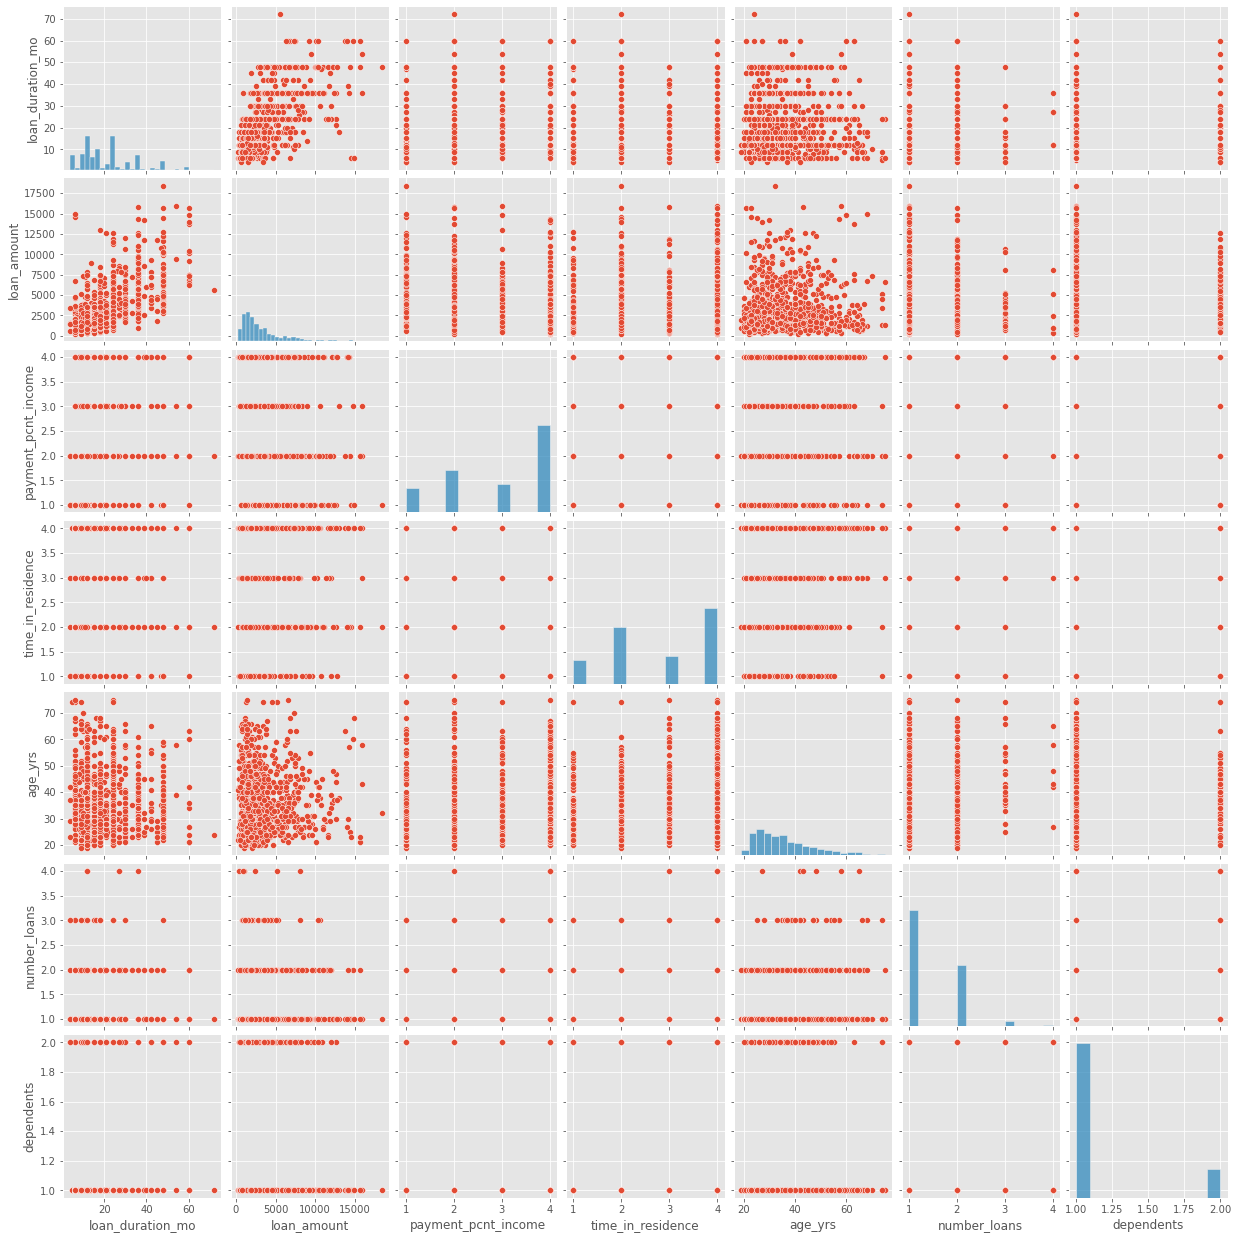

In [61]:
#Visualización de variables numéricas

sns.pairplot(d[numCols])
plt.show()

### Variable de salida

In [62]:
d.groupby('bad_credit').bad_credit.count().sort_values(ascending=False)

bad_credit
0    700
1    300
Name: bad_credit, dtype: int64

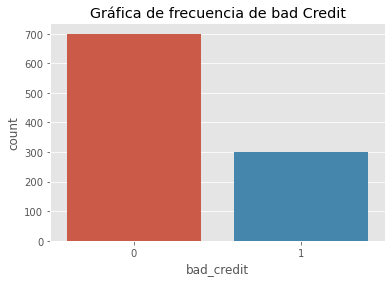

In [63]:
plt.figure(figsize=(6,4))

plt.title('Gráfica de frecuencia de bad Credit')
sns.countplot(d.bad_credit)

plt.show()

## 6. Preparación de datos

### Imputaciones

No se requiere imputaciones, solo se realizará la verificación de la completitud

In [64]:
# Identificación de valores nulos para las variables numéricas
for col in d[numCols]:
    print (col, np.sum(pd.isnull(d[col])))

loan_duration_mo 0
loan_amount 0
payment_pcnt_income 0
time_in_residence 0
age_yrs 0
number_loans 0
dependents 0


In [65]:
# Identificación de valores nulos para las variables categóricas
for col in d[catCols]:
    print (col, np.sum(pd.isnull(d[col])))

checking_account_status 0
credit_history 0
purpose 0
savings_account_balance 0
time_employed_yrs 0
gender_status 0
other_signators 0
property 0
other_credit_outstanding 0
home_ownership 0
job_category 0
telephone 0
foreign_worker 0


### Valores atípicos para las variables de entrada

In [66]:
#utilización de LocalOutlierFactor con 14 vecinos para identificar valores atípicos en las variables de entrada


# crear un objeto LocalOutlierFactor con n_neighbors=14
lof = LocalOutlierFactor(n_neighbors=14, contamination=0.1)

# identificar los valires atípicos por medio de lof 
y_pred = lof.fit_predict(d[numCols])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', d[outliers].index.tolist())

Indices de valores atípicos:  [0, 4, 13, 33, 58, 62, 63, 74, 75, 90, 94, 95, 110, 116, 135, 139, 148, 160, 180, 181, 184, 189, 191, 215, 221, 238, 263, 264, 272, 282, 286, 312, 314, 315, 337, 350, 363, 377, 381, 394, 395, 396, 411, 413, 442, 444, 451, 452, 454, 469, 490, 493, 505, 517, 519, 524, 539, 547, 553, 557, 573, 575, 594, 619, 627, 630, 632, 635, 639, 681, 718, 729, 748, 769, 772, 774, 777, 780, 781, 806, 807, 816, 818, 837, 848, 851, 882, 883, 884, 887, 898, 906, 907, 915, 917, 931, 933, 952, 975, 987]


In [67]:
# Eliminar los valores atípicos del dataframe original
df = d.loc[~outliers]

### Transformaciones

In [68]:
#Eliminación de categorias pequeñas para la variable Fuel Type

d['purpose'].value_counts().sort_values(ascending=False)

radio/television       280
car (new)              234
furniture/equipment    181
car (used)             103
business                97
education               50
repairs                 22
domestic appliances     12
other                   12
retraining               9
Name: purpose, dtype: int64

In [70]:
#Reemplazo de valores para la agrupación de categorías

#Diccionario con los reemplazos a realizar
reemplazos = {  "car (new)": "car"
              , "car (used)": "car"
              , "retraining": "education"
              , "domestic appliances": "repairs"}


#Se reemplazan los valores de acuerdo con el diccionario creado anteriormente
d['purpose'] = d['purpose'].map(reemplazos).fillna(d['purpose'])


#Visualización de las nuevos valores agrupados para la categoria 'Fuel Type'
d['purpose'].value_counts().sort_values(ascending=False)

car                    337
radio/television       280
furniture/equipment    181
business                97
education               59
repairs                 34
other                   12
Name: purpose, dtype: int64

### Sobremuestreo (oversampling)

In [23]:
#!pip install imblearn

In [71]:
# Se crea un objeto RandomOverSampler que permite crear copias aleatorias de las muestras de la clase 
# minoritaria para igualar el número de muestras entre las diferentes clases.
oversampler = RandomOverSampler()

# Se realiza el sobremuestreo para las variables de entrada y salida
X_resampled, y_resampled = oversampler.fit_resample(d.drop('bad_credit', axis=1), d['bad_credit'])

# Se crean dos dataframes con las variables de entrada y otro con la variable de salida a partir del proceso anterior
df1 = pd.DataFrame(X_resampled, columns=d.columns.drop('bad_credit'))
df2 = pd.DataFrame(y_resampled)

# Se concatenan los dataframes horizontalmente
df_balanced = pd.concat([df1, df2], axis=1)

In [72]:
# Dataset balanceado
df_balanced.head()

,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,0
1,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,none,...,real estate,22,none,own,1,skilled,1,none,yes,1
2,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,none,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,0
3,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,guarantor,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,0
4,< 0 DM,24,past payment delays,car,4870,< 100 DM,1 - 4 years,3,male-single,none,...,unknown-none,53,none,for free,2,skilled,2,none,yes,1


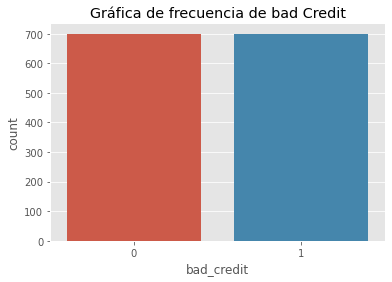

In [73]:
plt.figure(figsize=(6,4))

plt.title('Gráfica de frecuencia de bad Credit')
sns.countplot(df_balanced['bad_credit'])

plt.show()

## 7. Prueba dataset: Creación de un modelo

### Líbrerías

In [74]:
# Preparación de datos
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Modelado
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier



# Evaluación de modelos
# ==============================================================================
from sklearn import metrics

### Creación de Variables Dummies

In [76]:
# Aplicación de la función de get_dummies

df =pd.get_dummies(df_balanced, drop_first=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 46 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   loan_duration_mo                                        1400 non-null   int64
 1   loan_amount                                             1400 non-null   int64
 2   payment_pcnt_income                                     1400 non-null   int64
 3   time_in_residence                                       1400 non-null   int64
 4   age_yrs                                                 1400 non-null   int64
 5   number_loans                                            1400 non-null   int64
 6   dependents                                              1400 non-null   int64
 7   bad_credit                                              1400 non-null   int64
 8   checking_account_status_< 0 DM                          14

### Dividir el conjunto de datos

In [77]:
#Se crea una lista con todas las varibles de entrada

vDep = list(df.columns)
vDep.remove('bad_credit')

In [78]:
# División de los datos en train y test


# Se establecen los dataframes de con las variables de entrada X y la variable de salida y
X = df[vDep]
y = df['bad_credit']

In [79]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida 

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [80]:
#Escalar Variables

# Se establece la configuración para que los valores numéricos se vean con 4 decimales
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[numCols] = scaler.fit_transform(X_train[numCols])
X_test[numCols] = scaler.fit_transform(X_test[numCols])

X_train.head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,checking_account_status_< 0 DM,checking_account_status_> 200 DM or salary assignment,checking_account_status_none,...,property_unknown-none,other_credit_outstanding_none,other_credit_outstanding_stores,home_ownership_own,home_ownership_rent,job_category_skilled,job_category_unemployed-unskilled-non-resident,job_category_unskilled-resident,telephone_yes,foreign_worker_yes
756,0.3824,0.3038,1.0000,0.3333,0.1071,0.3333,0.0000,0,0,1,...,0,1,0,1,0,1,0,0,0,1
613,0.0882,0.0545,0.0000,1.0000,0.5179,0.0000,1.0000,0,1,0,...,1,1,0,0,0,0,0,1,0,1
1263,0.2941,0.6784,1.0000,0.3333,0.4464,0.0000,0.0000,0,0,0,...,1,1,0,0,0,0,0,0,1,1
593,0.1176,0.0074,1.0000,0.6667,0.6964,1.0000,0.0000,1,0,0,...,0,1,0,1,0,0,0,1,1,1
361,0.1176,0.0289,1.0000,0.3333,0.1607,0.0000,0.0000,0,0,1,...,0,1,0,1,0,1,0,0,0,1


### Creación del un modelo

In [81]:
# Creación del modelo randomForest con con 100 árboles y 5 niveles de profundidad

modelo = RandomForestClassifier(
            n_estimators =  100,
            max_features =  'auto',
            max_depth    =  5,
            criterion    = 'gini'
         )


# Entrenamiento del modelo

modelo.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='auto')

### Evaluación del modelo

In [82]:
y_predMod = modelo.predict(X_test)

print("Random Forest:",metrics.accuracy_score(y_test, y_predMod))
print(metrics.classification_report(y_test, y_predMod))

Random Forest: 0.7577197149643705
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       211
           1       0.74      0.79      0.76       210

    accuracy                           0.76       421
   macro avg       0.76      0.76      0.76       421
weighted avg       0.76      0.76      0.76       421



## 8. Exportar el dataset

In [83]:
# Exportamos el dataframe a un archivo CSV
df_balanced.to_csv('./datasets/02_GermanCredit_Prep.csv', index=False)

### Referencias


- *Dataset:*  
    - https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv
    
    
- *Machine learning con Python y Scikit-learn:*
    - https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html
    
    
- *LocalOutlierFactor:*
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
    

- *scikit-learn:*    
    - https://scikit-learn.org/stable/
    - https://scikit-learn.org/stable/user_guide.html
  
  
- *Gráficas con  seaborn:*
    - https://ichi.pro/es/como-utilizar-python-seaborn-para-analisis-de-datos-exploratorios-28897898172180

  